In [102]:
import pandas as pd
import pickle
import numpy as np

In [103]:
df = pickle.load(open('dataset_level2.pkl','rb'))

In [104]:
df

# batting_team
# bowling team
# city
# current score
# ball left
# wickets left
# current rr
# last five

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


In [105]:
df.isnull().sum()

match_id               0
batting_team           0
bowling_team           0
ball                   0
runs                   0
player_dismissed       0
city                8548
venue                  0
dtype: int64

In [106]:
df[df['city'].isnull()]['venue'].value_counts()

Dubai International Cricket Stadium        2969
Pallekele International Cricket Stadium    2066
Melbourne Cricket Ground                   1453
Sydney Cricket Ground                       749
Adelaide Oval                               498
Harare Sports Club                          372
Sharjah Cricket Stadium                     249
Sylhet International Cricket Stadium        128
Carrara Oval                                 64
Name: venue, dtype: int64

In [107]:
cities = np.where(df['city'].isnull(),df['venue'].str.split().apply(lambda x:x[0]),df['city'])

In [108]:
df['city'] = cities

In [109]:
df.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [110]:
df.drop(columns=['venue'],inplace=True)

In [111]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo
122,964,Sri Lanka,Australia,19.4,0,0,Colombo
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
124,964,Sri Lanka,Australia,19.6,2,0,Colombo


In [112]:
eligible_cities = df['city'].value_counts()[df['city'].value_counts() > 600].index.tolist()

In [113]:
df = df[df['city'].isin(eligible_cities)]

In [114]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo
122,964,Sri Lanka,Australia,19.4,0,0,Colombo
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
124,964,Sri Lanka,Australia,19.6,2,0,Colombo


In [115]:
df['current_score'] = df.groupby('match_id').cumsum()['runs']

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15856\1598928411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['current_score'] = df.groupby('match_id').cumsum()['runs']


In [116]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3
...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,125
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,125
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,127


In [117]:
df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])
df

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15856\2777558413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['over'] = df['ball'].apply(lambda x:str(x).split(".")[0])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_15856\2777558413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ball_no'] = df['ball'].apply(lambda x:str(x).split(".")[1])


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5
...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6


In [118]:
df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')
df

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15856\562775579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_bowled'] = (df['over'].astype('int')*6) + df['ball_no'].astype('int')


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120


In [119]:
df['balls_left'] = 120 - df['balls_bowled']
df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)
df

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15856\2304996896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = 120 - df['balls_bowled']
C:\Users\lenovo\AppData\Local\Temp\ipykernel_15856\2304996896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117,3
122,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118,2
123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119,1
124,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120,0


In [120]:
df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
df['player_dismissed'] = df['player_dismissed'].astype('int')
df['player_dismissed'] = df.groupby('match_id').cumsum()['player_dismissed']
df['wickets_left'] = 10 - df['player_dismissed']

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15856\540685528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x=='0' else 1)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_15856\540685528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].astype('int')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_15856\540685528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [121]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2
122,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2
123,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1
124,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1


In [122]:
df['crr'] = (df['current_score']*6)/df['balls_bowled']

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15856\914577034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crr'] = (df['current_score']*6)/df['balls_bowled']


In [123]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256
122,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932
123,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521
124,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000


In [124]:
groups = df.groupby('match_id')

match_ids = df['match_id'].unique()
last_five = []
for id in match_ids:
    last_five.extend(groups.get_group(id).rolling(window=30).sum()['runs'].values.tolist())

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15856\3055083752.py:6: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['batting_team', 'bowling_team', 'city'], dtype='object')
  last_five.extend(groups.get_group(id).rolling(window=30).sum()['runs'].values.tolist())


In [125]:
df['last_five'] = last_five

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15856\1595651733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_five'] = last_five


In [126]:
#df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five','']]

In [127]:
final_df = df.groupby('match_id').sum()['runs'].reset_index().merge(df,on='match_id')

In [128]:
final_df=final_df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five','runs_x']]

In [129]:
final_df.dropna(inplace=True)

In [130]:
final_df.isnull().sum()

batting_team     0
bowling_team     0
city             0
current_score    0
balls_left       0
wickets_left     0
crr              0
last_five        0
runs_x           0
dtype: int64

In [131]:
final_df = final_df.sample(final_df.shape[0])

In [132]:
final_df.sample(2)

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
28878,Pakistan,South Africa,Abu Dhabi,111,7,1,5.893805,21.0,119
14171,England,Australia,Southampton,169,5,4,8.817391,53.0,179


In [133]:
X = final_df.drop(columns=['runs_x'])
y = final_df['runs_x']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [134]:
X_train

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five
41752,Bangladesh,Sri Lanka,Chittagong,63,54,4,5.727273,21.0
38178,Sri Lanka,Pakistan,Dubai,86,36,6,6.142857,27.0
23820,Afghanistan,India,St Lucia,97,20,6,5.820000,40.0
36464,Australia,Sri Lanka,Sydney,124,11,7,6.825688,43.0
13237,Australia,India,Sydney,81,61,8,8.237288,39.0
...,...,...,...,...,...,...,...,...
15461,West Indies,South Africa,Johannesburg,87,68,10,10.038462,51.0
15710,England,Australia,Cape Town,49,71,7,6.000000,27.0
29096,India,West Indies,Trinidad,82,37,6,5.927711,25.0
40127,Bangladesh,India,Mirpur,55,61,7,5.593220,33.0


In [154]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score

In [136]:
algorithms = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()
}
results = {'Algorithm': [], 'MSE': [], 'MAE': [], 'R-squared': []}

In [137]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [138]:
XGB = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',XGBRegressor(n_estimators=1000,learning_rate=0.2,max_depth=12,random_state=1))
])


# XGBRegressor(n_estimators=1000,learning_rate=0.2,max_depth=12,random_state=1)

In [139]:
DTR = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',DecisionTreeRegressor())
])

In [140]:
LR = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',LinearRegression())
])

In [141]:
RFR = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',RandomForestRegressor())
])

In [142]:

SVR = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',SVR())
])

In [155]:
XGB.fit(X_train,y_train)
y_pred = XGB.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

results['Algorithm'].append("XGBoost")
results['MSE'].append(mean_squared_error(y_test,y_pred))
results['MAE'].append(mean_absolute_error(y_test,y_pred))
results['R-squared'].append(r2_score(y_test,y_pred))

c:\python\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.9870385097534876
1.7371154337068109
13.284862152964582


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [144]:
DTR.fit(X_train,y_train)
y_pred = DTR.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

results['Algorithm'].append("DecisionTree")
results['MSE'].append(mean_squared_error(y_test,y_pred))
results['MAE'].append(mean_absolute_error(y_test,y_pred))
results['R-squared'].append(r2_score(y_test,y_pred))

c:\python\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.9392655045882656
1.6307172557172558
62.24974012474012


In [145]:
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

results['Algorithm'].append("LinearRegression")
results['MSE'].append(mean_squared_error(y_test,y_pred))
results['MAE'].append(mean_absolute_error(y_test,y_pred))
results['R-squared'].append(r2_score(y_test,y_pred))

c:\python\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.6952034068653474
13.000158663357006
312.4008618975442


In [146]:
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

results['Algorithm'].append("RandomForest")
results['MSE'].append(mean_squared_error(y_test,y_pred))
results['MAE'].append(mean_absolute_error(y_test,y_pred))
results['R-squared'].append(r2_score(y_test,y_pred))

c:\python\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.978438245891073
2.1559657830907835
22.099691136232384


In [147]:
SVR.fit(X_train,y_train)
y_pred = SVR.predict(X_test)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

results['Algorithm'].append("SVR")
results['MSE'].append(mean_squared_error(y_test,y_pred))
results['MAE'].append(mean_absolute_error(y_test,y_pred))
results['R-squared'].append(r2_score(y_test,y_pred))

c:\python\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.8207536468523255
8.052048178116669
183.71831075745297


In [151]:
results

{'Algorithm': ['XGBoost',
  'DecisionTree',
  'LinearRegression',
  'RandomForest',
  'SVR'],
 'MSE': [13.284862152964582,
  62.24974012474012,
  312.4008618975442,
  22.099691136232384,
  183.71831075745297],
 'MAE': [1.7371154337068109,
  1.6307172557172558,
  13.000158663357006,
  2.1559657830907835,
  8.052048178116669],
 'R-squared': [0.9870385097534876,
  0.9392655045882656,
  0.6952034068653474,
  0.978438245891073,
  0.8207536468523255]}

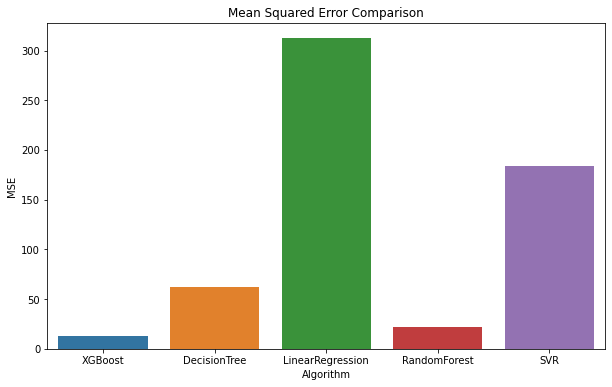

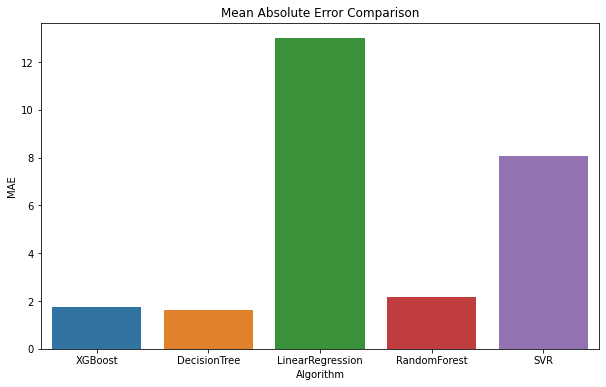

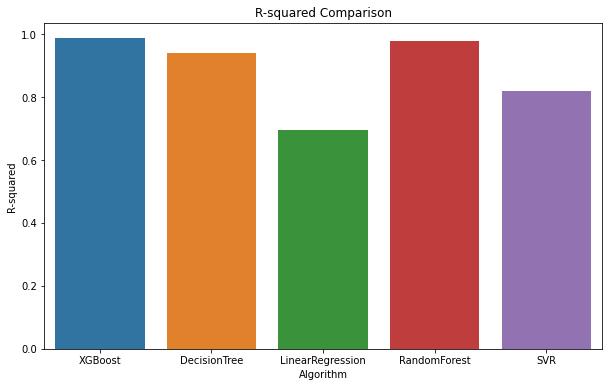

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for visualization
results_df = pd.DataFrame(results)

# Visualize results
plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='MSE', data=results_df)
plt.title('Mean Squared Error Comparison')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='MAE', data=results_df)
plt.title('Mean Absolute Error Comparison')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithm', y='R-squared', data=results_df)
plt.title('R-squared Comparison')
plt.show()


In [156]:
results_df

,Algorithm,MSE,MAE,R-squared
0,XGBoost,13.284862,1.737115,0.987039
1,DecisionTree,62.249740,1.630717,0.939266
2,LinearRegression,312.400862,13.000159,0.695203
3,RandomForest,22.099691,2.155966,0.978438
4,SVR,183.718311,8.052048,0.820754


In [149]:
pickle.dump(pipe,open('pipe.pkl','wb'))

In [150]:
import xgboost
xgboost.__version__

'1.7.6'